<a href="https://colab.research.google.com/github/AlfianKamil9/capstone-project/blob/ml/Model_form.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Path ke file CSV di Google Drive
file1 = '/content/drive/MyDrive/folder_projek_capstone/machine_learning/notebook_colab/dataset_fix.csv'
# file2 =

# Baca data CSV
import pandas as pd
import numpy as np
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import learning_curve
from PIL import Image
import matplotlib.pyplot as plt

df = pd.read_csv(file1)

#**Eksplor Data Form**

In [ ]:
# Tampilkan beberapa baris pertama data
print(df.head())


  tidak_tertawa tidak_melihat_hal_baik salahkan_diri cemas takut_tanpa_alasan  \
0             a                      a             a     a                  a   
1             b                      b             b     b                  b   
2             a                      a             a     a                  a   
3             a                      c             c     c                  c   
4             c                      c             c     c                  c   

  ketika_keadaan_diluar_kemampuan sulit_tidur sengsara sering_menangis  \
0                               a           a        a               a   
1                               b           b        b               b   
2                               a           a        a               a   
3                               c           c        c               c   
4                               c           c        c               c   

  melukai_diri               status  
0            a        depresi_

In [ ]:
# Info mengenai tipe data, jumlah entri, dan missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019 entries, 0 to 2018
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   tidak_tertawa                    2019 non-null   object
 1   tidak_melihat_hal_baik           2019 non-null   object
 2   salahkan_diri                    2019 non-null   object
 3   cemas                            2019 non-null   object
 4   takut_tanpa_alasan               2019 non-null   object
 5   ketika_keadaan_diluar_kemampuan  2019 non-null   object
 6   sulit_tidur                      2019 non-null   object
 7   sengsara                         2019 non-null   object
 8   sering_menangis                  2019 non-null   object
 9   melukai_diri                     2019 non-null   object
 10  status                           2019 non-null   object
dtypes: object(11)
memory usage: 173.6+ KB
None


In [ ]:

# Statistik deskriptif dari data
print(df.describe())

       tidak_tertawa tidak_melihat_hal_baik salahkan_diri cemas  \
count           2019                   2019          2019  2019   
unique             4                      4             4     4   
top                c                      c             d     d   
freq             527                    526           532   553   

       takut_tanpa_alasan ketika_keadaan_diluar_kemampuan sulit_tidur  \
count                2019                            2019        2019   
unique                  4                               4           4   
top                     d                               d           d   
freq                  556                             537         551   

       sengsara sering_menangis melukai_diri         status  
count      2019            2019         2019           2019  
unique        4               4            4              4  
top           d               d            d  depresi_berat  
freq        551             575          632      

In [ ]:
unique_values = df['status'].unique()
print(unique_values)

['depresi_berat' 'Depresi_Ringan' 'Kemungkinan_Depresi' 'Aman']


In [ ]:
list(df.select_dtypes(['object']).columns)

['tidak_tertawa',
 'tidak_melihat_hal_baik',
 'salahkan_diri',
 'cemas',
 'takut_tanpa_alasan',
 'ketika_keadaan_diluar_kemampuan',
 'sulit_tidur',
 'sengsara',
 'sering_menangis',
 'melukai_diri',
 'status']

#**Pembersihan dan Pre-process Data:**

# FORM

## Memeriksa missing values

In [ ]:
# Memeriksa missing values
print(df.isnull().sum())

tidak_tertawa                      0
tidak_melihat_hal_baik             0
salahkan_diri                      0
cemas                              0
takut_tanpa_alasan                 0
ketika_keadaan_diluar_kemampuan    0
sulit_tidur                        0
sengsara                           0
sering_menangis                    0
melukai_diri                       0
status                             0
dtype: int64


# Konversi label kategori menjadi angka

In [ ]:
nilai_sebelum_encoding = df['status'].copy()

In [ ]:
#encoding categorical features
le = LabelEncoder()

df['tidak_tertawa'] = le.fit_transform(df.tidak_tertawa)
df['tidak_melihat_hal_baik'] = le.fit_transform(df.tidak_melihat_hal_baik)
df['salahkan_diri'] = le.fit_transform(df.salahkan_diri)
df['cemas'] = le.fit_transform(df.cemas)
df['takut_tanpa_alasan'] = le.fit_transform(df.takut_tanpa_alasan)
df['ketika_keadaan_diluar_kemampuan'] = le.fit_transform(df.ketika_keadaan_diluar_kemampuan)
df['sulit_tidur'] = le.fit_transform(df.sulit_tidur)
df['sengsara'] = le.fit_transform(df.sengsara)
df['sering_menangis'] = le.fit_transform(df.sering_menangis)
df['melukai_diri'] = le.fit_transform(df.melukai_diri)
df['status'] = le.fit_transform(df.status)

In [ ]:
#Mengecek apakah masih ada kolom bertipe object
df.select_dtypes('object').columns.any()

False

In [ ]:

pd.set_option('display.max_columns', None )
df.head(40)

,tidak_tertawa,tidak_melihat_hal_baik,salahkan_diri,cemas,takut_tanpa_alasan,ketika_keadaan_diluar_kemampuan,sulit_tidur,sengsara,sering_menangis,melukai_diri,status
0,0,0,0,0,0,0,0,0,0,0,3
1,1,1,1,1,1,1,1,1,1,1,3
2,0,0,0,0,0,0,0,0,0,0,3
3,0,2,2,2,2,2,2,2,2,2,1
4,2,2,2,2,2,2,2,2,2,2,2
5,0,2,0,0,2,3,1,2,1,1,3
6,3,3,3,3,3,3,3,3,3,3,0
7,0,0,0,1,1,3,1,1,0,1,3
8,3,0,2,3,3,1,1,3,2,3,2
9,3,3,1,3,3,1,3,1,3,3,0


In [ ]:
nilai_sesudah_encoding = df['status']

# Tampilkan nilai sebelum dan sesudah encoding
for sebelum, sesudah in zip(nilai_sebelum_encoding, nilai_sesudah_encoding):
    print(f'Nilai sebelum encoding: {sebelum}, Nilai setelah encoding: {sesudah}')

Nilai sebelum encoding: depresi_berat, Nilai setelah encoding: 3
Nilai sebelum encoding: depresi_berat, Nilai setelah encoding: 3
Nilai sebelum encoding: depresi_berat, Nilai setelah encoding: 3
Nilai sebelum encoding: Depresi_Ringan, Nilai setelah encoding: 1
Nilai sebelum encoding: Kemungkinan_Depresi, Nilai setelah encoding: 2
Nilai sebelum encoding: depresi_berat, Nilai setelah encoding: 3
Nilai sebelum encoding: Aman, Nilai setelah encoding: 0
Nilai sebelum encoding: depresi_berat, Nilai setelah encoding: 3
Nilai sebelum encoding: Kemungkinan_Depresi, Nilai setelah encoding: 2
Nilai sebelum encoding: Aman, Nilai setelah encoding: 0
Nilai sebelum encoding: Kemungkinan_Depresi, Nilai setelah encoding: 2
Nilai sebelum encoding: depresi_berat, Nilai setelah encoding: 3
Nilai sebelum encoding: depresi_berat, Nilai setelah encoding: 3
Nilai sebelum encoding: depresi_berat, Nilai setelah encoding: 3
Nilai sebelum encoding: Kemungkinan_Depresi, Nilai setelah encoding: 2
Nilai sebelum enco

# **Train and Test Split**

In [ ]:
X = df.drop('status', axis = 1)
y = df['status']

In [ ]:
X

,tidak_tertawa,tidak_melihat_hal_baik,salahkan_diri,cemas,takut_tanpa_alasan,ketika_keadaan_diluar_kemampuan,sulit_tidur,sengsara,sering_menangis,melukai_diri
0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0
3,0,2,2,2,2,2,2,2,2,2
4,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...
2014,0,2,3,2,3,1,1,2,3,1
2015,1,2,0,0,0,3,0,3,0,2
2016,3,0,1,1,0,2,0,3,1,1
2017,1,0,1,1,2,1,3,3,1,2


In [ ]:
y

0       3
1       3
2       3
3       1
4       2
       ..
2014    1
2015    3
2016    3
2017    3
2018    1
Name: status, Length: 2019, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1615, 10), (404, 10), (1615,), (404,))

# IMAGE

# zip-gambar-1

In [ ]:
# Path ke direktori dataset yang telah diekstrak
data_dir_angry = '/content/drive/MyDrive/folder_projek_capstone/machine_learning/ekstrak_dataset_1/data/Angry'
data_dir_happy = '/content/drive/MyDrive/folder_projek_capstone/machine_learning/ekstrak_dataset_1/data/Happy'
data_dir_sad = '/content/drive/MyDrive/folder_projek_capstone/machine_learning/ekstrak_dataset_1/data/Sad'
# List semua file dalam direktori
file_list1 = os.listdir(data_dir_angry)
file_list2 = os.listdir(data_dir_happy)
file_list3 = os.listdir(data_dir_sad)

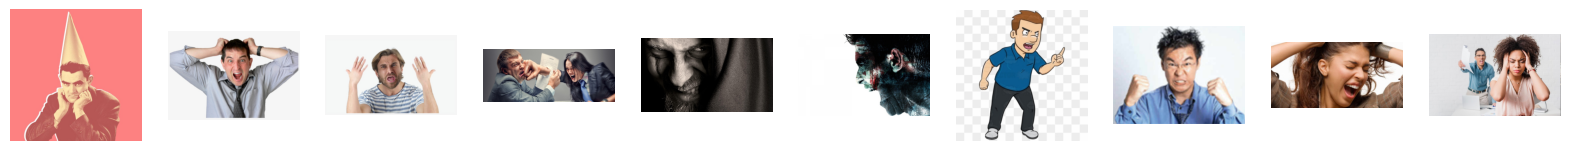

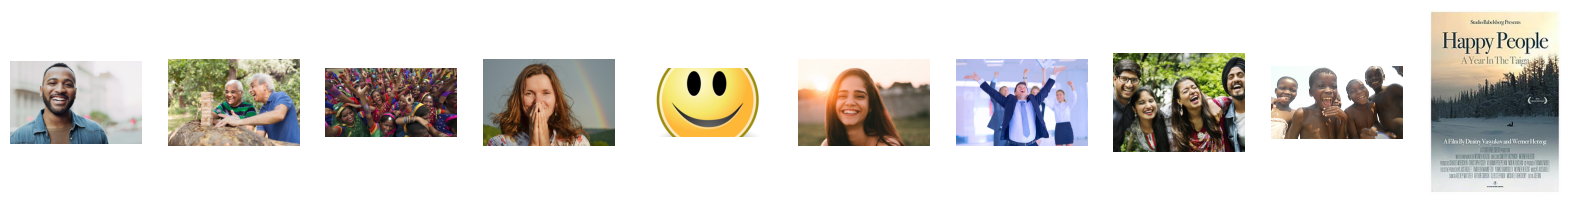

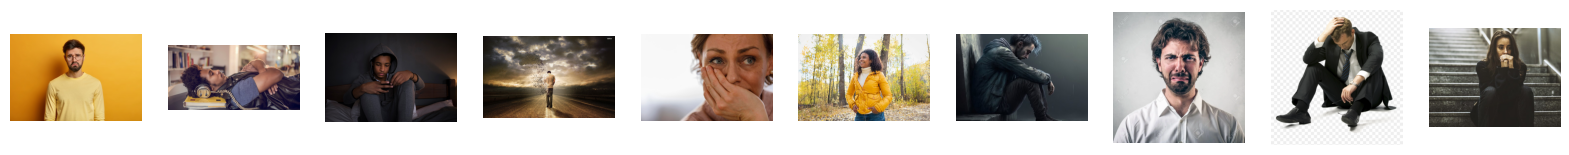

In [ ]:
num_samples_to_display = 10
plt.figure(figsize=(20, 10))
for i in range(num_samples_to_display):
    img_path = os.path.join(data_dir_angry, file_list1[i])
    img = Image.open(img_path)
    plt.subplot(1, num_samples_to_display, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title('')
plt.show()
plt.figure(figsize=(20, 10))
for i in range(num_samples_to_display):
    img_path = os.path.join(data_dir_happy, file_list2[i])
    img = Image.open(img_path)
    plt.subplot(1, num_samples_to_display, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title('')
plt.show()
plt.figure(figsize=(20, 10))
for i in range(num_samples_to_display):
    img_path = os.path.join(data_dir_sad, file_list3[i])
    img = Image.open(img_path)
    plt.subplot(1, num_samples_to_display, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title('')
plt.show()

# Pre-Process Image Zip-1

# **Modeling Image Zip-1**

# zip-gambar-2

In [3]:
# Path ke direktori dataset yang telah diekstrak
base_image_dir = '/content/drive/MyDrive/folder_projek_capstone/machine_learning/ekstrak_dataset_2/images/images'
training_dir2 = '/content/drive/MyDrive/folder_projek_capstone/machine_learning/ekstrak_dataset_2/undersampling_dataset'
validation_dir2 = '/content/drive/MyDrive/folder_projek_capstone/machine_learning/ekstrak_dataset_2/images/images/validation'
# List semua file dalam direktori
# base_image_dir = os.listdir(base_image_dir)
# training_dir = os.listdir(training_dir)
# validation_dir = os.listdir(validation_dir)

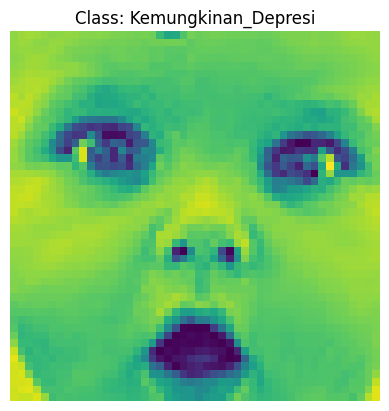

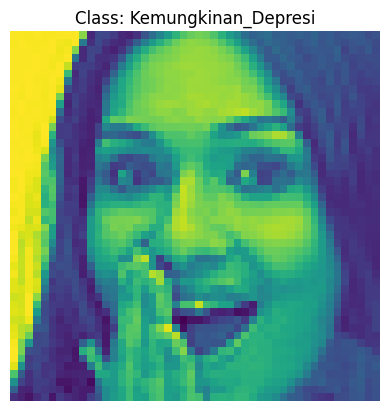

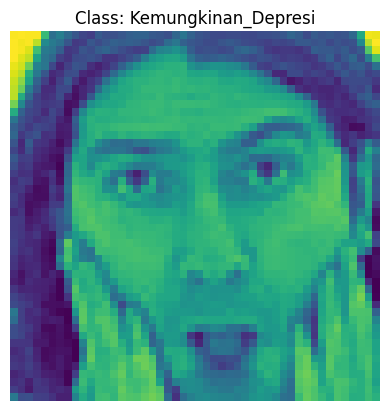

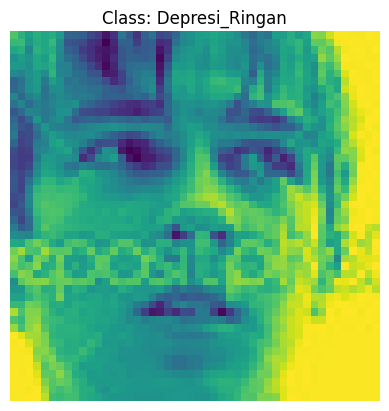

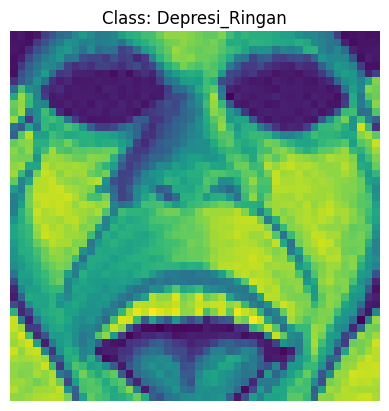

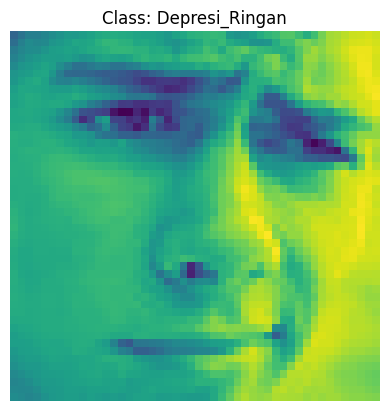

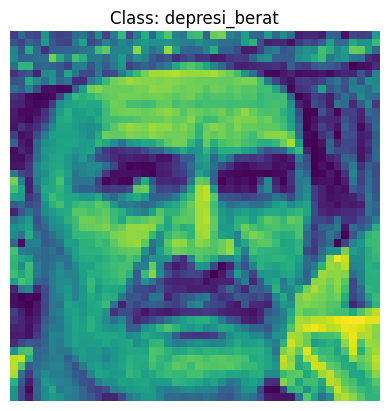

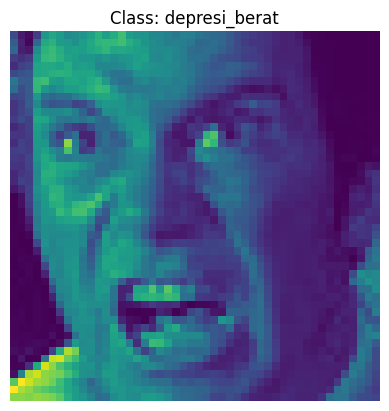

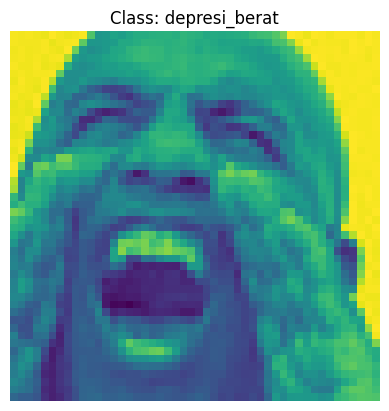

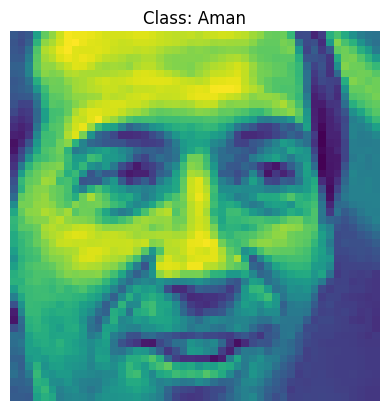

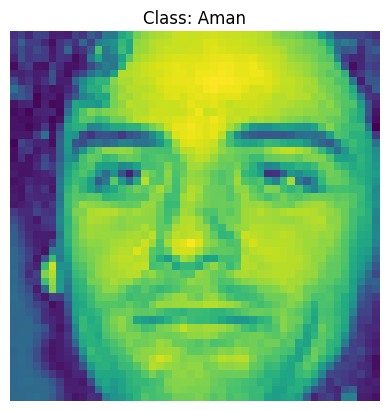

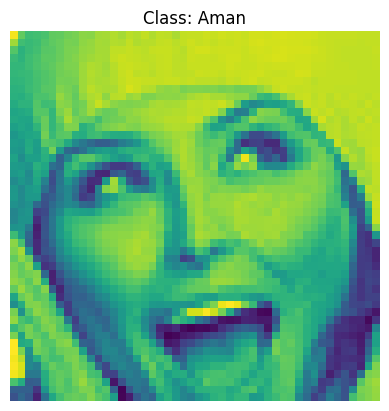

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Fungsi untuk menampilkan gambar-gambar dari setiap kelas dalam direktori
def show_images_in_classes(directory):
    classes = os.listdir(directory)  # Mendapatkan daftar kelas di dalam direktori

    for class_name in classes:
        class_path = os.path.join(directory, class_name)  # Path untuk setiap kelas
        if os.path.isdir(class_path):  # Pastikan itu adalah direktori
            images = os.listdir(class_path)  # Daftar gambar di dalam kelas tersebut

            # Menampilkan beberapa gambar dari setiap kelas (misalnya, 3 gambar)
            for i in range(3):
                image_name = images[i]
                image_path = os.path.join(class_path, image_name)  # Path untuk setiap gambar
                if os.path.isfile(image_path):  # Pastikan itu adalah file
                    image = Image.open(image_path)

                    plt.imshow(image)
                    plt.title(f'Class: {class_name}')
                    plt.axis('off')
                    plt.show()

# Menampilkan gambar dari masing-masing direktori
# show_images_in_classes(base_image_dir)
show_images_in_classes(training_dir2)

In [ ]:
import os

# Path ke folder yang ingin Anda periksa
folder_path = '/content/drive/MyDrive/folder_projek_capstone/machine_learning/ekstrak_dataset_1/data/Happy'  # Ganti dengan path folder yang ingin Anda cek

# Mendapatkan daftar file dalam folder
files_in_folder = os.listdir(folder_path)

# Menghitung jumlah file dalam folder
num_files = len(files_in_folder)

print(f"Jumlah file di folder '{folder_path}' adalah: {num_files}")

Jumlah file di folder '/content/drive/MyDrive/folder_projek_capstone/machine_learning/ekstrak_dataset_1/data/Happy' adalah: 100


In [ ]:
# import os
# import random
# import shutil

# # Path ke folder sumber dan tujuan
# folder_sumber = '/content/drive/MyDrive/folder_projek_capstone/machine_learning/ekstrak_dataset_1/data/Happy'
# folder_tujuan = '/path/to/destination_folder'

# # List semua file dalam folder sumber
# files = os.listdir(folder_sumber)

# # Jumlah file yang ingin Anda salin secara acak
# jumlah_file = 10  # Ganti dengan jumlah yang Anda inginkan

# # Memilih secara acak file sejumlah yang diinginkan
# file_yang_disalin = random.sample(files, jumlah_file)

# # Menyalin file ke folder tujuan
# for file in file_yang_disalin:
#     source = os.path.join(folder_sumber, file)
#     destination = os.path.join(folder_tujuan, file)
#     shutil.copyfile(source, destination)

In [ ]:
# import cv2
# import os

# dataset_path = "/content/drive/MyDrive/folder_projek_capstone/machine_learning/ekstrak_dataset_2/undersampling_dataset/Aman"

# # List semua file gambar dalam folder dataset
# image_files = [f for f in os.listdir(dataset_path) if os.path.isfile(os.path.join(dataset_path, f))]

# # Loop melalui setiap file gambar dan periksa ukurannya
# for image_file in image_files:
#     image_path = os.path.join(dataset_path, image_file)
#     img = cv2.imread(image_path)
#     height, width, _ = img.shape
#     print(f"File: {image_file}, Width: {width}, Height: {height}")

In [ ]:
# import os

# folder_path = "/content/drive/MyDrive/folder_projek_capstone/machine_learning/ekstrak_dataset_2/images/images/validation/depresi_berat"  # Ganti dengan path direktori yang ingin Anda periksa

# # Mendapatkan semua nama file dalam direktori
# files = os.listdir(folder_path)

# # Menginisialisasi hitungan
# jpg_png_count = 0
# other_count = 0

# # Memeriksa setiap file untuk ekstensi .jpg dan .png, dan menghitung jumlahnya
# for file in files:
#     if file.lower().endswith(('.jpg', '.png')):
#         jpg_png_count += 1
#     else:
#         other_count += 1
#         file_path = os.path.join(folder_path, file)
#         os.remove(file_path)  # Menghapus file yang bukan .jpg atau .png

# # Menampilkan hasil
# print(f"Total file dengan ekstensi .jpg atau .png: {jpg_png_count}")
# print(f"Total file selain .jpg atau .png yang telah dihapus: {other_count}")

In [ ]:
from PIL import Image
import os

folder_path = "/content/drive/MyDrive/folder_projek_capstone/machine_learning/ekstrak_dataset_2/images/images/validation/depresi_berat"  # Ganti dengan path direktori yang ingin Anda periksa

def is_image_corrupted(file_path):
    try:
        Image.open(file_path).verify()
        return False
    except (IOError, SyntaxError):
        return True

# Mendapatkan semua nama file dalam direktori
files = os.listdir(folder_path)

# Memeriksa setiap file untuk melihat apakah merupakan gambar yang rusak
corrupted_found = False
for file in files:
    file_path = os.path.join(folder_path, file)
    if is_image_corrupted(file_path):
        print(f"File {file} dalam direktori tersebut mungkin rusak atau tidak sesuai format.")
        os.remove(file_path)  # Menghapus file yang rusak
        print(f"File {file} telah dihapus.")
        corrupted_found = True

# Memberikan pesan jika tidak ada file yang rusak
if not corrupted_found:
    print("Tidak ada file yang rusak atau tidak sesuai format dalam direktori tersebut.")

Tidak ada file yang rusak atau tidak sesuai format dalam direktori tersebut.


# Mencari File

In [6]:
import os

folder_path = "/content/drive/MyDrive/folder_projek_capstone/machine_learning/ekstrak_dataset_2/undersampling_dataset/Kemungkinan_Depresi"  # Ganti dengan path direktori yang ingin Anda periksa
search_name = "28888.jpg"  # Ganti dengan nama file yang ingin Anda cari

# Mencari file dengan nama tertentu dalam folder
files_with_name = [file for file in os.listdir(folder_path) if file == search_name]

# Menampilkan daftar file yang ditemukan
print(f"File dengan nama {search_name} dalam direktori tersebut:")
for file in files_with_name:
    print(file)

File dengan nama 28888.jpg dalam direktori tersebut:
28888.jpg


In [ ]:
# import os

# file_path = "/content/drive/MyDrive/folder_projek_capstone/machine_learning/ekstrak_dataset_2/undersampling_dataset/Depresi_Ringan/34268.jpg"  # Ganti dengan path file yang ingin Anda hapus

# # Memeriksa apakah file ada sebelum dihapus
# if os.path.exists(file_path):
#     os.remove(file_path)
#     print(f"File {file_path} telah dihapus.")
# else:
#     print(f"File {file_path} tidak ditemukan atau sudah dihapus sebelumnya.")

# Pre-Process Image zip-2

In [ ]:
import tensorflow as tf

# Tentukan ukuran gambar yang diinginkan dan batch size
target_size = (200, 200)
batch_size = 64

# Gunakan ImageDataGenerator untuk melakukan preprocessing
train_datagen2 = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,  # Normalisasi nilai piksel ke rentang [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Inisialisasi generator gambar untuk data validasi (tidak perlu augmentasi untuk data validasi)
val_datagen2 = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Muat gambar dari direktori dan lakukan preprocessing
train_generator2 = train_datagen2.flow_from_directory(
        training_dir2,
        target_size=target_size,
        batch_size=batch_size,
        color_mode='grayscale',
        class_mode='categorical')  # Ubah class_mode menjadi 'categorical' karena ada lebih dari 2 kelas

validation_generator2 = val_datagen2.flow_from_directory(
        validation_dir2,
        target_size=target_size,
        batch_size=batch_size,
        color_mode='grayscale',
        class_mode='categorical')

Found 18155 images belonging to 4 classes.
Found 4516 images belonging to 4 classes.


In [ ]:
num_classes = len(train_generator2.class_indices)
print("Jumlah kelas yang ditemukan oleh generator gambar:", num_classes)

# Mendapatkan daftar kelas dari generator gambar
class_list = list(train_generator2.class_indices.keys())
class_list_val = list(validation_generator2.class_indices.keys())

# Menampilkan daftar kelas
print("Daftar kelas yang ada:")
print(class_list)
print(class_list_val)

Jumlah kelas yang ditemukan oleh generator gambar: 4
Daftar kelas yang ada:
['Aman', 'Depresi_Ringan', 'Kemungkinan_Depresi', 'depresi_berat']
['Aman', 'Depresi_Ringan', 'Kemungkinan_Depresi', 'depresi_berat']


In [ ]:
from collections import Counter

# Hitung jumlah sampel untuk setiap kelas dalam dataset train_generator2
samples_per_class = Counter(train_generator2.classes)
samples_per_class_val = Counter(validation_generator2.classes)

# Mengambil pemetaan kelas dari generator gambar training
class_mapping_train = train_generator2.class_indices
class_mapping_train = {v: k for k, v in class_mapping_train.items()}

# Menggunakan pemetaan kelas dari generator gambar validasi
class_mapping_val = validation_generator2.class_indices
class_mapping_val = {v: k for k, v in class_mapping_val.items()}

# Menggunakan class_mapping_train untuk menampilkan jumlah sampel untuk setiap nama kelas dalam data training
print("Data Training:")
for class_index, count in samples_per_class.items():
    class_name = class_mapping_train[class_index]
    print(f"{class_name} memiliki {count} sampel.")

# Menggunakan class_mapping_val untuk menampilkan jumlah sampel untuk setiap nama kelas dalam data validasi
print("\nData Validasi:")
for class_index, count in samples_per_class_val.items():
    class_name = class_mapping_val[class_index]
    print(f"{class_name} memiliki {count} sampel.")


Data Training:
Aman memiliki 4539 sampel.
Depresi_Ringan memiliki 4538 sampel.
Kemungkinan_Depresi memiliki 4539 sampel.
depresi_berat memiliki 4539 sampel.

Data Validasi:
Aman memiliki 1129 sampel.
Depresi_Ringan memiliki 1129 sampel.
Kemungkinan_Depresi memiliki 1129 sampel.
depresi_berat memiliki 1129 sampel.


# **Modeling Image Zip-2**

In [ ]:
import tensorflow as tf
# from tensorflow.keras.callbacks import EarlyStopping

modelCNN = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')  # Menggunakan softmax untuk 4 kelas
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002)
optimizer2 = tf.keras.optimizers.RMSprop(learning_rate=0.0001)

# Inisialisasi EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3, restore_best_weights=True, mode='max')

modelCNN.compile(optimizer=optimizer,
              loss='categorical_crossentropy',  # Ubah loss function untuk klasifikasi banyak kelas
              metrics=['accuracy'])

In [ ]:
from PIL import Image

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.95):
            print("\nTarget telah dicapai, berhenti training !!!")
            self.model.stop_training = True

callback = myCallback()

history2 = modelCNN.fit(
      train_generator2,
      # steps_per_epoch=284,
      epochs=50,  # Training setiap epoch secara terpisah
      validation_data=validation_generator2,
      # validation_steps=71,
      callbacks=[early_stopping]
)

Epoch 1/50
284/284 [==============================] - 2950s 10s/step - loss: 1.3989 - accuracy: 0.2727 - val_loss: 1.3792 - val_accuracy: 0.2998
Epoch 2/50
284/284 [==============================] - 113s 399ms/step - loss: 1.3743 - accuracy: 0.3010 - val_loss: 1.3755 - val_accuracy: 0.3007
Epoch 3/50
284/284 [==============================] - 114s 401ms/step - loss: 1.3691 - accuracy: 0.3108 - val_loss: 1.3639 - val_accuracy: 0.3375
Epoch 4/50
284/284 [==============================] - 111s 392ms/step - loss: 1.3648 - accuracy: 0.3209 - val_loss: 1.3546 - val_accuracy: 0.3335
Epoch 5/50
284/284 [==============================] - 114s 400ms/step - loss: 1.3578 - accuracy: 0.3308 - val_loss: 1.3431 - val_accuracy: 0.3494
Epoch 6/50
284/284 [==============================] - 111s 392ms/step - loss: 1.3509 - accuracy: 0.3352 - val_loss: 1.3139 - val_accuracy: 0.3806
Epoch 7/50
284/284 [==============================] - 114s 401ms/step - loss: 1.3422 - accuracy: 0.3464 - val_loss: 1.3064 - 

In [ ]:
# Evaluasi model terhadap data validasi
loss, accuracy = modelCNN.evaluate(validation_generator2)
print(f'Loss: {loss}, Accuracy: {accuracy}')

71/71 [==============================] - 8s 115ms/step - loss: 1.0069 - accuracy: 0.5611
Loss: 1.0069040060043335, Accuracy: 0.5611160397529602


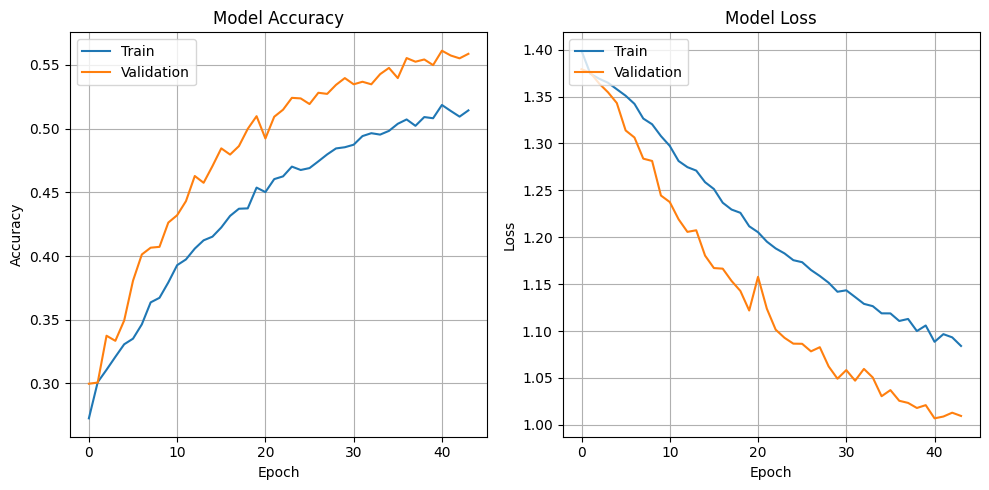

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
import numpy as np

# Path ke gambar yang ingin diprediksi
image_path = '/content/drive/MyDrive/folder_projek_capstone/machine_learning/ekstrak_dataset_2_fix/images/images/validation/neutral/10134.jpg'

# Memuat gambar dalam skala keabuan (grayscale)
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(200, 200), color_mode='grayscale')

# Mengubah gambar menjadi array numpy
img_array = tf.keras.preprocessing.image.img_to_array(img)

# Menambahkan dimensi tambahan karena model membutuhkan bentuk (batch_size, width, height, channels)
# Di sini, channels adalah 1 karena gambar grayscale
img_array = np.expand_dims(img_array, axis=0)

# Normalisasi nilai piksel menjadi rentang [0, 1]
img_array = img_array / 255.0

# Melakukan prediksi menggunakan model
predictions = modelCNN.predict(img_array)

# Mendapatkan indeks kelas prediksi
predicted_class = np.argmax(predictions)

# Dictionary yang memetakan nomor kelas ke label yang sesuai
class_mapping = {
    0: 'Aman',
    1: 'Depresi_Ringan',
    2: 'Kemungkinan_Depresi',
    3: 'depresi_berat'
    # Sesuaikan dengan label kelas yang sesuai dengan model Anda
}

# Mendapatkan label untuk kelas yang diprediksi
predicted_label = class_mapping[predicted_class]

print(f"Prediksi kelas: {predicted_label}")

1/1 [==============================] - 0s 75ms/step
Prediksi kelas: Kemungkinan_Depresi


# Model CNN (Warna)

In [9]:
import tensorflow as tf
# from tensorflow.keras.callbacks import EarlyStopping

modelCNNRGB = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')  # Menggunakan softmax untuk 4 kelas
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0003)
optimizer2 = tf.keras.optimizers.RMSprop(learning_rate=0.0001)

# Inisialisasi EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3, restore_best_weights=True, mode='max')

modelCNNRGB.compile(optimizer=optimizer,
              loss='categorical_crossentropy',  # Ubah loss function untuk klasifikasi banyak kelas
              metrics=['accuracy'])

In [7]:
import tensorflow as tf

# Tentukan ukuran gambar yang diinginkan dan batch size
target_size = (200, 200)
batch_size = 64

# Gunakan ImageDataGenerator untuk melakukan preprocessing
train_datagenwarna = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,  # Normalisasi nilai piksel ke rentang [0, 1]
    rotation_range=40,
    width_shift_range=0.4,
    height_shift_range=0.4,
    shear_range=0.4,
    zoom_range=0.5,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Inisialisasi generator gambar untuk data validasi (tidak perlu augmentasi untuk data validasi)
val_datagenwarna = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Muat gambar dari direktori dan lakukan preprocessing
train_generatorwarna = train_datagenwarna.flow_from_directory(
        training_dir2,
        target_size=target_size,
        batch_size=batch_size,
        color_mode='rgb',
        class_mode='categorical')  # Ubah class_mode menjadi 'categorical' karena ada lebih dari 2 kelas

validation_generatorwarna = val_datagenwarna.flow_from_directory(
        validation_dir2,
        target_size=target_size,
        batch_size=batch_size,
        color_mode='rgb',
        class_mode='categorical')

Found 18155 images belonging to 4 classes.
Found 4516 images belonging to 4 classes.


In [ ]:
from PIL import Image

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.95):
            print("\nTarget telah dicapai, berhenti training !!!")
            self.model.stop_training = True

callback = myCallback()

history2 = modelCNNRGB.fit(
      train_generatorwarna,
      # steps_per_epoch=284,
      epochs=50,  # Training setiap epoch secara terpisah
      validation_data=validation_generatorwarna,
      # validation_steps=71,
      callbacks=[early_stopping]
)

Epoch 1/50
104/284 [=========>....................] - ETA: 1:01:09 - loss: 1.4556 - accuracy: 0.2581

# Transfer Learning

VGG16

In [4]:
import tensorflow as tf

# Tentukan ukuran gambar yang diinginkan dan batch size
target_size = (200, 200)
batch_size = 32

# Gunakan ImageDataGenerator untuk melakukan preprocessing
train_datagen_tf1 = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,  # Normalisasi nilai piksel ke rentang [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Inisialisasi generator gambar untuk data validasi (tidak perlu augmentasi untuk data validasi)
val_datagen_tf1 = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Muat gambar dari direktori dan lakukan preprocessing
train_generator3_tf1 = train_datagen_tf1.flow_from_directory(
        training_dir2,
        target_size=(200, 200),
        batch_size=32,
        color_mode='rgb',
        class_mode='categorical')  # Ubah class_mode menjadi 'categorical' karena ada lebih dari 2 kelas

validation_generator2_tf1 = val_datagen_tf1.flow_from_directory(
        validation_dir2,
        target_size=(200, 200),
        batch_size=32,
        color_mode='rgb',
        class_mode='categorical')

Found 18155 images belonging to 4 classes.
Found 4516 images belonging to 4 classes.


In [ ]:
import tensorflow as tf
print(tf.__version__)


2.14.0


In [5]:
import tensorflow as tf
# from tensorflow.keras.applications import VGG16
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Flatten
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load pre-trained VGG16 model
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

# Membuat model baru di atas base_model
modelTF1 = tf.keras.models.Sequential()
modelTF1.add(base_model)
modelTF1.add(tf.keras.layers.Flatten())
modelTF1.add(tf.keras.layers.Dense(512, activation='relu'))
modelTF1.add(tf.keras.layers.Dense(4, activation='softmax'))  # 4 kelas ekspresi wajah

# Freeze base_model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile model
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.95):
            print("\nTarget telah dicapai, berhenti training !!!")
            self.model.stop_training = True

callback = myCallback()

optimizer = tf.keras.optimizers.Adam(learning_rate=0.003)
optimizer2 = tf.keras.optimizers.RMSprop(learning_rate=0.003)

modelTF1.compile(
    optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy']
    )

# Train the model
history3 = modelTF1.fit(
            train_generator3_tf1,
            # steps_per_epoch=50,
            epochs=50,  # Training setiap epoch secara terpisah
            # validation_steps=3,
            validation_data=validation_generator2_tf1,
            batch_size=32,
            callbacks=[callback]
        )

58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/50
568/568 [==============================] - 10119s 18s/step - loss: 1.7636 - accuracy: 0.3925 - val_loss: 1.2855 - val_accuracy: 0.3733
Epoch 2/50
568/568 [==============================] - 10129s 18s/step - loss: 1.2250 - accuracy: 0.4372 - val_loss: 1.2091 - val_accuracy: 0.4504
Epoch 3/50
349/568 [=================>............] - ETA: 52:12 - loss: 1.2034 - accuracy: 0.4541

KeyboardInterrupt: ignored

InceptionV3

In [ ]:
import tensorflow as tf
# from tensorflow.keras.applications import InceptionV3
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load pre-trained InceptionV3 model
base_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(200, 200, 1))

# Membuat model baru di atas base_model
modelTF2 = tf.keras.models.Sequential()
modelTF2.add(base_model)
modelTF2.add(tf.keras.layers.GlobalAveragePooling2D())
modelTF2.add(tf.keras.layers.Dense(256, activation='relu'))
modelTF2.add(tf.keras.layers.Dense(4, activation='softmax'))  # Misalnya, 7 kelas ekspresi wajah

# Freeze base_model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.003)
optimizer2 = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.0005)

modelTF2.compile(optimizer=optimizer2, loss='categorical_crossentropy', metrics=['accuracy'])

# # Load and preprocess dataset using ImageDataGenerator
# train_datagen =tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
# train_generator = train_datagen.flow_from_directory(
#         'path_to_train_directory',
#         target_size=(299, 299),
#         batch_size=32,
#         class_mode='categorical')

# Train the model
history4 = modelTF2.fit(
            train_generator2,
            # steps_per_epoch=50,
            epochs=50,  # Training setiap epoch secara terpisah
            # validation_steps=3,
            validation_data=validation_generator2,
            batch_size=32,
            callbacks=[callback]
        )

# **Modeling Form**

## Deep Learning (NN biasa)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers
from tensorflow.keras import optimizers

modelNN = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, input_dim=10, activation='relu', name='input_layer'),
    tf.keras.layers.Dense(32, activation='relu', name='hidden_layer_1'),
    tf.keras.layers.Dense(32, activation='relu', name='hidden_layer_2'),
    tf.keras.layers.Dense(4, activation="softmax", name='output_layer')
])

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.95 and logs.get('val_accuracy')>0.95):
            print("\nTarget telah dicapai, berhenti training !!!")
            self.model.stop_training = True

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0003)  # Mengubah learning rate

callback = myCallback()

modelNN.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = modelNN.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_test, y_test), callbacks=callback)


In [ ]:
# Plot loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
modelNN.summary()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

import numpy as np
loss, accuracy = modelNN.evaluate(X_test, y_test)
print(f'Akurasi: {accuracy * 100:.2f}%')

# Mapping dari huruf ke angka
letter_to_number = {'a': 0, 'b': 1, 'c': 2, 'd': 3}

# Fungsi Konversi urutan huruf menjadi urutan angka berdasarkan Mapping yang telah ditentukan
def convert_letters_to_numbers(input_letters_list):
    return [[letter_to_number[letter] for letter in input_letters] for input_letters in input_letters_list]

# Input untuk model
input_letters_list = [
    ['a', 'b', 'c', 'd', 'b', 'c', 'a', 'c', 'c', 'd']
]

# Konversi urutan huruf menjadi urutan angka menggunakan fungsi convert_letters_to_number
input_numbers_list = convert_letters_to_numbers(input_letters_list)

# Ubah menjadi array numpy agar bisa diprediksi oleh model
test_array = np.array(input_numbers_list)

# Lakukan prediksi dengan model
predictions = modelNN.predict(test_array)

# Mapping dari nilai angka ke label string
label_mapping = {
    0: 'Aman',
    1: 'Depresi Ringan',
    2: 'Kemungkinan Depresi',
    3: 'Depresi Berat'
}

# MKonversi hasil prediksi dari angka ke String menggunakan Mapping(Label_Mapping)
predicted_classes = np.argmax(predictions, axis=1)
predicted_labels = [label_mapping[pred] for pred in predicted_classes]

# Tampilkan hasil prediksi dalam bentuk label yang deskriptif
print("Hasil Prediksi:")
print(predicted_labels)

In [ ]:
from tensorflow.keras.models import load_model

# Menyimpan model ke format .h5
modelNN.save('modelNN.h5')

In [ ]:
import requests

# Simpan model ke dalam format JSON
model_json = modelNN.to_json()
with open("modelNN.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
import tensorflow as tf
print(tf.__version__)

# Simpan Model untuk TFJS

In [ ]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 79.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 5.1 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled t

In [ ]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(modelCNN, 'modelNN_2')

AttributeError: ignored

In [ ]:
from google.colab import files

# Unduh folder model_tfjs sebagai zip
!zip -r modelNN_2.zip modelNN_2

# Unduh file zip
files.download('modelNN_2.zip')

# Simpan Model untuk TFJS-2

In [ ]:
# Simpan model dalam format Keras
modelCNN.save('/content/drive/MyDrive/folder_projek_capstone/machine_learning/model/tfjs_modelCNN/modelCNN_1.h5')

In [ ]:
!tensorflowjs_converter --input_format keras /content/drive/MyDrive/folder_projek_capstone/machine_learning/model/tfjs_modelCNN/modelCNN_1.h5 /content/drive/MyDrive/folder_projek_capstone/machine_learning/model/tfjs_modelCNN/cnn_1

2023-12-03 11:09:17.495238: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-03 11:09:17.495288: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-03 11:09:17.496582: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-03 11:09:18.628449: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
from google.colab import files

# Unduh folder model_tfjs sebagai zip
!zip -r /content/drive/MyDrive/folder_projek_capstone/machine_learning/model/tfjs_modelCNN/modelCNN_1.h5 /content/drive/MyDrive/folder_projek_capstone/machine_learning/model/tfjs_modelCNN/cnn_1

# Unduh file zip
from google.colab import files
files.download('/content/drive/MyDrive/folder_projek_capstone/machine_learning/model/tfjs_modelCNN/cnn_1')

	zip warning: missing end signature--probably not a zip file (did you
	zip warning: remember to use binary mode when you transferred it?)
	zip warning: (if you are trying to read a damaged archive try -F)

zip error: Zip file structure invalid (/content/drive/MyDrive/folder_projek_capstone/machine_learning/model/tfjs_modelCNN/modelCNN_1.h5)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Modeling Sistem Voting**